In [36]:
library(microeco)
library(file2meco)

library(ggplot2)
library(ggpubr)
library(qiime2R)
library(Maaslin2)
library(microbiome)
library(microViz)
library(phyloseq)
library(tidyverse)  





In [2]:
abund_file_path <- system.file("extdata", "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_tables_BacArc_fill_EPA2.qza", package="file2meco")
sample_file_path <- system.file("extdata", "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv", package="file2meco")
taxonomy_file_path <- system.file("extdata", "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/tax_EPA2.qza", package="file2meco")


In [3]:
ASV_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_tables_BacArc_fill_EPA2.qza")
ASV_table <- ASV_qza$data
head(ASV_table)

dim(ASV_table)


taxa_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/tax_EPA2.qza")
taxa_table <- taxa_qza$data
taxa_table <- taxa_qza$data %>%
as_tibble() %>% 
#select(-Confidence) %>% 
separate(Taxon, sep=";", c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>%
arrange(Feature.ID) %>%
mutate(ASVs =paste('ASV',1:n(), sep = "_")) %>%
column_to_rownames("Feature.ID")%>%
as.matrix()


#read metadata file and set factor order
meta = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv",
               header=TRUE, row.names=1)
meta$Site_Num <- as.integer(meta$Site_Num)
meta$Site.Status <- factor(meta$Site.Status, levels = c("Vulnerable",
                                                         "Epidemic","Endemic"))
head(meta, n=2)
dim(meta)

,R1.1.W,R1.10.W,R1.11.W,R1.12.W,R1.13.W,R1.14.W,R1.15.W,R1.16.W,R1.17.W,R1.18.W,⋯,GR.SINT.En4,GR.SINT.En5,GR.SINT.En6,TP.DLAB.En1,TP.DLAB.En2,TP.DLAB.En3,TP.DLAB.En4,TP.DLAB.En5,TP.DLAB.En6,TP.DSTO.En1
72caa013fe7649c65ffe72138ff7dfd1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2b248f10cca3c82a2640506132f9c869,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4af34e31f4f29f5372246db273985eb8,12,18,24,19,20,28,21,23,19,26,⋯,0,0,38,0,197,37,149,198,14,0
516a7dfb3358a03ad54608b2bfe54ded,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
63c48fb71320865b89f020cc70ce9bae,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5ca9f99167b7bf31249f42965de904ff,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 11756  1109

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 103262 rows [1, 2, 3, 7,
8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 26, 27, ...].”


,samp,Sample.ID,Site,Site.Name,Region,Project,Type,Species_sample,Sample.Type,Site.Status,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
518.H,518.H_S18,518.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,OFAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
519.H,519.H_S18,519.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,Coral,OFAV,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0


[1] 360  45

In [4]:
ps = phyloseq(otu_table(ASV_table, taxa_are_rows=TRUE), 
               sample_data(meta),
tax_table(taxa_table))
ps %>% tax_fix()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 360 samples ]
sample_data() Sample Data:       [ 360 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

In [5]:
phyloseq2meco(ps)

477 taxa with 0 abundance are removed from the otu_table ...



microtable-class object:
sample_table have 360 rows and 45 columns
otu_table have 11279 rows and 360 columns
tax_table have 11756 rows and 9 columns

In [6]:
ps_coral= subset_samples(ps, Type=="Coral")
ps_coral_fill = filter_taxa(ps_coral, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_coral_fill 

# Subset samples healthy and then by species
ps_AH <- subset_samples(ps_coral, Sample.Type=="Healthy")

ps_AH_fill = filter_taxa(ps_AH, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_AH_fill 
                            
ps_ah_DSTO=subset_samples(ps_AH, Species_sample=="DSTO")
ps_ah_DSTO
ps_ah_SINT=subset_samples(ps_AH, Species_sample=="SINT")
ps_ah_SINT
ps_ah_MCAV=subset_samples(ps_AH, Species_sample=="MCAV")
ps_ah_MCAV
ps_ah_OFAV=subset_samples(ps_AH, Species_sample=="OFAV")
ps_ah_OFAV
ps_ah_PSTR=subset_samples(ps_AH, Species_sample=="PSTR")
ps_ah_PSTR

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1304 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 1304 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 915 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 915 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 17 samples ]
sample_data() Sample Data:       [ 17 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 28 samples ]
sample_data() Sample Data:       [ 28 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 29 samples ]
sample_data() Sample Data:       [ 29 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

In [7]:
ps_fill_dsto = filter_taxa(ps_ah_DSTO, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_dsto
ps_fill_sint = filter_taxa(ps_ah_SINT, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_sint
ps_fill_mcav = filter_taxa(ps_ah_MCAV, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_mcav
ps_fill_ofav = filter_taxa(ps_ah_OFAV, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_ofav               
ps_fill_pstr = filter_taxa(ps_ah_PSTR, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_pstr                           

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1427 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 1427 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2016 taxa and 17 samples ]
sample_data() Sample Data:       [ 17 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 2016 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 535 taxa and 28 samples ]
sample_data() Sample Data:       [ 28 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 535 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 805 taxa and 29 samples ]
sample_data() Sample Data:       [ 29 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 805 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1222 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 1222 taxa by 9 taxonomic ranks ]

In [8]:
# Subset samples for Sediment type
ps_Sediment <- subset_samples(ps, subset = sample_data(ps)$Type == "Sediment")

ps_fill_s = filter_taxa(ps_Sediment, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_s

ps_Water <- subset_samples(ps, subset = sample_data(ps)$Type == "Water")

ps_fill_w = filter_taxa(ps_Water, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_w


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4389 taxa and 90 samples ]
sample_data() Sample Data:       [ 90 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 4389 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 940 taxa and 96 samples ]
sample_data() Sample Data:       [ 96 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 940 taxa by 9 taxonomic ranks ]

In [9]:
ps_merge_AH=merge_phyloseq(ps_fill_dsto, ps_fill_sint, ps_fill_mcav, ps_fill_ofav,ps_fill_pstr)
ps_merge_AH

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2858 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 2858 taxa by 9 taxonomic ranks ]

In [10]:
meco_merge_AH=phyloseq2meco(ps_merge_AH)
meco_merge_s=phyloseq2meco(ps_fill_s)
meco_merge_w=phyloseq2meco(ps_fill_w)

## Run FAPROTAX

In [11]:
t1 <- trans_func$new(meco_merge_AH)
t1$cal_spe_func(prok_database = "FAPROTAX")
t1$cal_spe_func_perc(abundance_weighted = TRUE)
# use list to prepare data
tmp <- list()
# transpose res_spe_func_perc to be a data.frame like taxonomic abundance
tmp$func <- as.data.frame(t(t1$res_spe_func_perc), check.names = FALSE)
# assign the list as taxa_abund in your microtable object
dataset$taxa_abund <- tmp
head(tmp$func)

FAPROTAX v1.2.10. Please also cite the original FAPROTAX paper: Louca et al. (2016).

Decoupling function and taxonomy in the global ocean microbiome. Science, 353(6305), 1272.


The functional binary table is stored in object$res_spe_func ...

The result table is stored in object$res_spe_func_perc ...



,R3S7A1,R3S7A2,R3S7A3,R3S7A4,R3S7A5,CG.DSTO.En1,CG.DSTO.En2,CG.DSTO.En3,CG.DSTO.En4,CG.DSTO.En5,⋯,LP.PSTR.En2,LP.PSTR.En3,LP.PSTR.En4,LP.PSTR.En5,LP.PSTR.En6,LP.PSTR1.H,LP.PSTR3.H,LP.PSTR4.H,LP.PSTR5.H,LP.PSTR6.H
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
methanotrophy,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.02,0.00,0.02,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
methanol_oxidation,0.03,0.00,0.00,0.02,0.00,0.45,0.86,1.14,0.48,0.43,⋯,1.87,9.19,0.68,1.33,3.67,0.25,0.28,0.57,0.40,0.20
methylotrophy,0.03,0.00,0.00,0.02,0.00,0.45,0.86,1.14,0.48,0.43,⋯,1.87,9.19,0.68,1.33,3.67,0.25,0.28,0.57,0.40,0.20
aerobic_ammonia_oxidation,0.20,0.52,0.05,0.00,0.13,0.10,0.16,0.09,0.18,0.01,⋯,0.09,0.07,0.07,0.22,0.02,0.12,0.05,0.05,0.10,0.05
nitrification,0.20,0.52,0.05,0.00,0.13,0.10,0.16,0.09,0.18,0.01,⋯,0.09,0.07,0.07,0.22,0.02,0.12,0.05,0.05,0.10,0.05
sulfate_respiration,0.56,0.23,2.21,0.10,1.36,0.23,0.22,0.00,0.07,0.03,⋯,0.08,0.11,0.06,0.40,0.01,0.26,0.04,0.29,0.36,0.17


In [12]:
ps_far_AH = phyloseq(otu_table(tmp$func, taxa_are_rows=TRUE), 
               sample_data(meta))
ps_far_AH

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 41 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 45 sample variables ]

In [13]:
sum_far_AH  <- ps_far_AH %>% psmelt()

head(sum_far_AH)

,Sample,OTU,Abundance,samp,Sample.ID,Site,Site.Name,Region,Project,Type,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1302,CG.SINT.En4,intracellular_parasites,84.85,CG.SINT.En4_S6,CG.SINT.En4_S6,NA,Cliff.Green,Lower Keys,EPA2,Coral,⋯,0,0,1,0,0,0,0,0,0,0
1548,CG.SINT4.H,intracellular_parasites,76.54,CG.SINT4.H_S3,CG.SINT4.H_S3,NA,Cliff.Green,Lower Keys,EPA2,Coral,⋯,0,0,0,1,0,0,0,0,0,0
4017,XP.OFAV.En3,chemoheterotrophy,70.14,XP.OFAV.En3_S5,XP.OFAV.En3_S5,Site-G,Xesto.Patch,Lower Keys,EPA2,Coral,⋯,0,0,1,0,0,0,0,0,0,0
1507,CG.SINT3.H,intracellular_parasites,68.60,CG.SINT3.H_S3,CG.SINT3.H_S3,NA,Cliff.Green,Lower Keys,EPA2,Coral,⋯,0,0,0,1,0,0,0,0,0,0
901,CG.DSTO.En5,chemoheterotrophy,67.92,CG.DSTO.En5_S6,CG.DSTO.En5_S6,NA,Cliff.Green,Lower Keys,EPA2,Coral,⋯,0,0,1,0,0,0,0,0,0,0
2746,LP.PSTR.En4,chemoheterotrophy,67.19,LP.PSTR.En4_S6,LP.PSTR.En4_S6,Site-H,Lindsays.Patch,Lower Keys,EPA2,Coral,⋯,0,0,1,0,0,0,0,0,0,0


In [14]:
t1 <- trans_func$new(meco_merge_s)
t1$cal_spe_func(prok_database = "FAPROTAX")
t1$cal_spe_func_perc(abundance_weighted = TRUE)
# use list to prepare data
tmp <- list()
# transpose res_spe_func_perc to be a data.frame like taxonomic abundance
tmp$func <- as.data.frame(t(t1$res_spe_func_perc), check.names = FALSE)
# assign the list as taxa_abund in your microtable object
dataset$taxa_abund <- tmp
head(tmp$func)
ps_far_s = phyloseq(otu_table(tmp$func, taxa_are_rows=TRUE), 
               sample_data(meta))
ps_far_s

FAPROTAX v1.2.10. Please also cite the original FAPROTAX paper: Louca et al. (2016).

Decoupling function and taxonomy in the global ocean microbiome. Science, 353(6305), 1272.


The functional binary table is stored in object$res_spe_func ...

The result table is stored in object$res_spe_func_perc ...



,R3.1.S,R3.10.S,R3.11.S,R3.12.S,R3.13.S,R3.14.S,R3.15.S,R3.16.S,R3.17.S,R3.18.S,⋯,XP.En1.S,XP.En10.S,XP.En12.S,XP.En2.S,XP.En3.S,XP.En5.S,XP.En6.S,XP.En7.S,XP.En8.S,XP.En9.S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
methanol_oxidation,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.03,0.01,0.04,0.01,0.02,0.01,0.00,0.00,0.01
methylotrophy,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.03,0.01,0.04,0.01,0.02,0.01,0.00,0.00,0.01
aerobic_ammonia_oxidation,4.93,4.66,3.98,1.50,3.80,1.28,3.25,6.97,2.34,7.08,⋯,4.75,9.04,5.72,5.04,6.55,8.74,8.28,5.58,9.51,6.29
aerobic_nitrite_oxidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,⋯,0.05,0.00,0.05,0.03,0.05,0.01,0.10,0.05,0.00,0.02
nitrification,4.93,4.66,3.98,1.50,3.80,1.28,3.25,6.97,2.34,7.10,⋯,4.80,9.04,5.77,5.07,6.61,8.76,8.38,5.63,9.51,6.32
sulfate_respiration,12.56,10.74,6.44,6.32,5.94,3.10,8.89,6.91,7.27,7.79,⋯,4.88,3.73,5.17,4.92,7.12,4.64,4.90,6.99,10.56,5.28


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 35 taxa and 90 samples ]
sample_data() Sample Data:       [ 90 samples by 45 sample variables ]

In [15]:
t1 <- trans_func$new(meco_merge_w)
t1$cal_spe_func(prok_database = "FAPROTAX")
t1$cal_spe_func_perc(abundance_weighted = TRUE)
# use list to prepare data
tmp <- list()
# transpose res_spe_func_perc to be a data.frame like taxonomic abundance
tmp$func <- as.data.frame(t(t1$res_spe_func_perc), check.names = FALSE)
# assign the list as taxa_abund in your microtable object
dataset$taxa_abund <- tmp
head(tmp$func)
ps_far_w = phyloseq(otu_table(tmp$func, taxa_are_rows=TRUE), 
               sample_data(meta))
ps_far_w

FAPROTAX v1.2.10. Please also cite the original FAPROTAX paper: Louca et al. (2016).

Decoupling function and taxonomy in the global ocean microbiome. Science, 353(6305), 1272.


The functional binary table is stored in object$res_spe_func ...

The result table is stored in object$res_spe_func_perc ...



,R3.1.W,R3.10.W,R3.11.W,R3.12.W,R3.13.W,R3.14.W,R3.15.W,R3.16.W,R3.17.W,R3.18.W,⋯,XP.En9.W,CG.En11.W,CG.En12.W,CG.En2.W,CG.En3.W,CG.En4.W,CG.En5.W,CG.En7.W,CG.En8.W,CG.En9.W
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
methanol_oxidation,0.06,0.06,0.07,0.10,0.06,0.07,0.08,0.07,0.07,0.07,⋯,0.59,0.15,0.15,0.10,0.18,0.26,0.22,0.15,0.14,0.08
methylotrophy,0.06,0.06,0.07,0.10,0.06,0.07,0.08,0.07,0.07,0.07,⋯,0.59,0.15,0.15,0.10,0.18,0.26,0.22,0.15,0.14,0.08
aerobic_ammonia_oxidation,0.13,0.33,0.40,0.29,0.45,0.31,0.37,0.39,0.31,0.31,⋯,0.03,0.04,0.06,0.02,0.02,0.01,0.03,0.02,0.03,0.03
nitrification,0.13,0.33,0.40,0.29,0.45,0.31,0.37,0.39,0.31,0.31,⋯,0.03,0.04,0.06,0.02,0.02,0.01,0.03,0.02,0.03,0.03
sulfate_respiration,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,⋯,0.04,0.05,0.04,0.07,0.03,0.03,0.02,0.02,0.05,0.03
respiration_of_sulfur_compounds,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,⋯,0.04,0.05,0.04,0.07,0.03,0.03,0.02,0.02,0.05,0.03


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 33 taxa and 96 samples ]
sample_data() Sample Data:       [ 96 samples by 45 sample variables ]

### make dataframes long

In [16]:
sum_far  <- ps_far_w %>% psmelt()

head(sum_far)

,Sample,OTU,Abundance,samp,Sample.ID,Site,Site.Name,Region,Project,Type,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
358,CG10.W,photosynthetic_cyanobacteria,28.85,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,Water,⋯,2,0,0,0,0,0,0,0,0,1
359,CG10.W,oxygenic_photoautotrophy,28.85,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,Water,⋯,2,0,0,0,0,0,0,0,0,1
360,CG10.W,photoautotrophy,28.85,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,Water,⋯,2,0,0,0,0,0,0,0,0,1
361,CG10.W,phototrophy,28.85,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,Water,⋯,2,0,0,0,0,0,0,0,0,1
556,CG5.W,photosynthetic_cyanobacteria,26.68,CG5.W_S8,CG5.W_S8,NA,Cliff.Green,Lower Keys,EPA2,Water,⋯,2,0,0,0,0,0,0,0,0,1
557,CG5.W,oxygenic_photoautotrophy,26.68,CG5.W_S8,CG5.W_S8,NA,Cliff.Green,Lower Keys,EPA2,Water,⋯,2,0,0,0,0,0,0,0,0,1


## Run differntial abundance analysis 

In [17]:
meta_far_AH <- as(sample_data(ps_far_AH), "data.frame")

In [18]:
fit_data_coral = Maaslin2(
    input_data = otu_table(ps_far_AH), 
    input_metadata = meta_far_AH,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.05,
     cores=4,
     random_effects = c('Site.Name', 'Species_sample'),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/faprotax2/", 
    correction = "BH",
    fixed_effects = c("Site.Status", "Season"),
    reference = c("Site.Status,Vulnerable"))
     

2025-03-25 16:06:25.491084 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/faprotax2//maaslin2.log"
2025-03-25 16:06:25.647798 INFO::Writing function arguments to log file
2025-03-25 16:06:25.656635 INFO::Verifying options selected are valid
2025-03-25 16:06:25.684261 INFO::Determining format of input files
2025-03-25 16:06:25.684951 INFO::Input format is data samples as columns and metadata samples as rows
2025-03-25 16:06:25.687488 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Species_sample)
2025-03-25 16:06:25.688422 INFO::Formula for fixed effects: expr ~  Site.Status + Season
2025-03-25 16:06:25.689258 INFO::Filter data based on min abundance and min prevalence
2025-03-25 16:06:25.689689 INFO::Total samples in data: 117
2025-03-25 16:06:25.690109 INFO::Min samples required with min abundance for a feature not to be filtered: 11.700000
2025-03-2

In [19]:
meta_far_s <- as(sample_data(ps_far_s), "data.frame")

In [20]:
fit_data_s = Maaslin2(
    input_data = otu_table(ps_far_s), 
    input_metadata = meta_far_s,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.05,
     cores=4,
     random_effects = c('Site.Name'),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment//faprotax", 
    correction = "BH",
    fixed_effects = c("Site.Status", "Season"),
    reference = c("Site.Status,Vulnerable"))
     

2025-03-25 16:06:34.886666 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment//faprotax/maaslin2.log"
2025-03-25 16:06:35.000363 INFO::Writing function arguments to log file
2025-03-25 16:06:35.004054 INFO::Verifying options selected are valid
2025-03-25 16:06:35.004549 INFO::Determining format of input files
2025-03-25 16:06:35.005036 INFO::Input format is data samples as columns and metadata samples as rows
2025-03-25 16:06:35.007448 INFO::Formula for random effects: expr ~ (1 | Site.Name)
2025-03-25 16:06:35.007963 INFO::Formula for fixed effects: expr ~  Site.Status + Season
2025-03-25 16:06:35.008704 INFO::Filter data based on min abundance and min prevalence
2025-03-25 16:06:35.009142 INFO::Total samples in data: 90
2025-03-25 16:06:35.009568 INFO::Min samples required with min abundance for a feature not to be filtered: 9.000000
2025-03-25 16:06:35.010538 INFO:

In [21]:
meta_far_w <- as(sample_data(ps_far_w), "data.frame")

In [28]:
fit_data_w = Maaslin2(
    input_data = otu_table(ps_far_w), 
    input_metadata = meta_far_w,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.05,
     cores=4,
     random_effects = c('Site.Name'),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water//faprotax", 
    correction = "BH",
    fixed_effects = c("Site.Status", "Season"),
    reference = c("Site.Status,Vulnerable"))
     

2025-03-25 16:11:42.374799 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water//faprotax/maaslin2.log"
2025-03-25 16:11:42.48656 INFO::Writing function arguments to log file
2025-03-25 16:11:42.490581 INFO::Verifying options selected are valid
2025-03-25 16:11:42.491112 INFO::Determining format of input files
2025-03-25 16:11:42.49163 INFO::Input format is data samples as columns and metadata samples as rows
2025-03-25 16:11:42.494259 INFO::Formula for random effects: expr ~ (1 | Site.Name)
2025-03-25 16:11:42.494879 INFO::Formula for fixed effects: expr ~  Site.Status + Season
2025-03-25 16:11:42.495734 INFO::Filter data based on min abundance and min prevalence
2025-03-25 16:11:42.496186 INFO::Total samples in data: 96
2025-03-25 16:11:42.496621 INFO::Min samples required with min abundance for a feature not to be filtered: 9.600000
2025-03-25 16:11:42.497592 INFO::Tota

## Figure 7

In [22]:
#extract results
coral_df=fit_data_coral$results %>%
mutate(Sample_type = "Coral")


In [29]:
#extract results
wat_df=fit_data_w$results %>%
mutate(Sample_type = "Water")

In [30]:
#extract results
sediment_df=fit_data_s$results %>%
mutate(Sample_type = "Sediment")

In [31]:
#view data
head(sediment_df)
head(coral_df)
head(wat_df)

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,Sample_type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>
1,human_pathogens_all,Season,wet,-3.851340,0.2628732,1.092952e-25,Seasonwet,5.410114e-24,96,67,Sediment
2,human_associated,Season,wet,-3.851340,0.2628732,1.092952e-25,Seasonwet,5.410114e-24,96,67,Sediment
3,aerobic_ammonia_oxidation,Season,wet,4.547996,0.6195914,8.527209e-11,Seasonwet,2.110484e-09,96,95,Sediment
4,nitrification,Season,wet,4.547996,0.6195914,8.527209e-11,Seasonwet,2.110484e-09,96,95,Sediment
5,animal_parasites_or_symbionts,Season,wet,-3.397605,0.5236798,4.332234e-09,Seasonwet,8.577823e-08,96,78,Sediment
6,photosynthetic_cyanobacteria,Season,wet,-1.283067,0.2070695,1.647151e-08,Seasonwet,1.811866e-07,96,96,Sediment


,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,Sample_type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>
1,aliphatic_non_methane_hydrocarbon_degradation,Site.Status,Endemic,-4.771230,0.7056720,6.645861e-10,Site.StatusEndemic,6.978154e-08,117,66,Coral
2,photosynthetic_cyanobacteria,Season,wet,-1.639064,0.2805309,5.139269e-08,Seasonwet,1.079247e-06,117,117,Coral
3,oxygenic_photoautotrophy,Season,wet,-1.639064,0.2805309,5.139269e-08,Seasonwet,1.079247e-06,117,117,Coral
4,photoautotrophy,Season,wet,-1.639064,0.2805309,5.139269e-08,Seasonwet,1.079247e-06,117,117,Coral
5,phototrophy,Season,wet,-1.639064,0.2805309,5.139269e-08,Seasonwet,1.079247e-06,117,117,Coral
6,aliphatic_non_methane_hydrocarbon_degradation,Site.Status,Epidemic,-4.106047,0.7139027,7.888831e-08,Site.StatusEpidemic,1.380545e-06,117,66,Coral


,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,Sample_type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>
1,human_pathogens_all,Season,wet,-3.851340,0.2628732,1.092952e-25,Seasonwet,5.410114e-24,96,67,Water
2,human_associated,Season,wet,-3.851340,0.2628732,1.092952e-25,Seasonwet,5.410114e-24,96,67,Water
3,aerobic_ammonia_oxidation,Season,wet,4.547996,0.6195914,8.527209e-11,Seasonwet,2.110484e-09,96,95,Water
4,nitrification,Season,wet,4.547996,0.6195914,8.527209e-11,Seasonwet,2.110484e-09,96,95,Water
5,animal_parasites_or_symbionts,Season,wet,-3.397605,0.5236798,4.332234e-09,Seasonwet,8.577823e-08,96,78,Water
6,photosynthetic_cyanobacteria,Season,wet,-1.283067,0.2070695,1.647151e-08,Seasonwet,1.811866e-07,96,96,Water


In [32]:
# combine the results from each dataframe 
combo_df=rbind(sediment_df, coral_df, wat_df)
head(combo_df)
dim(combo_df)

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,Sample_type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>
1,human_pathogens_all,Season,wet,-3.851340,0.2628732,1.092952e-25,Seasonwet,5.410114e-24,96,67,Sediment
2,human_associated,Season,wet,-3.851340,0.2628732,1.092952e-25,Seasonwet,5.410114e-24,96,67,Sediment
3,aerobic_ammonia_oxidation,Season,wet,4.547996,0.6195914,8.527209e-11,Seasonwet,2.110484e-09,96,95,Sediment
4,nitrification,Season,wet,4.547996,0.6195914,8.527209e-11,Seasonwet,2.110484e-09,96,95,Sediment
5,animal_parasites_or_symbionts,Season,wet,-3.397605,0.5236798,4.332234e-09,Seasonwet,8.577823e-08,96,78,Sediment
6,photosynthetic_cyanobacteria,Season,wet,-1.283067,0.2070695,1.647151e-08,Seasonwet,1.811866e-07,96,96,Sediment


[1] 303  11

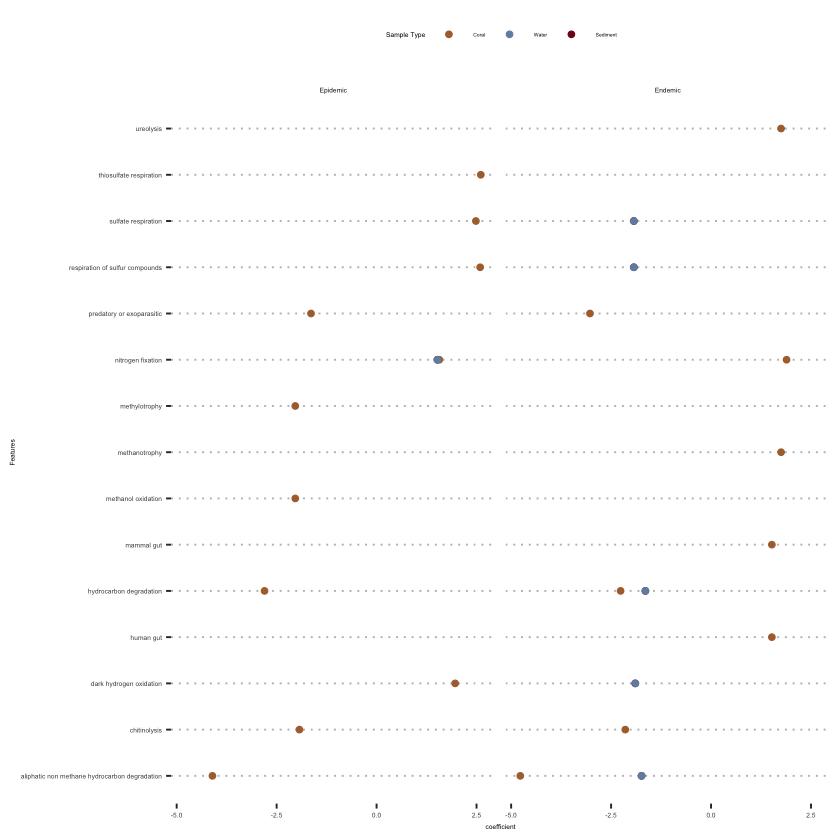

In [33]:
combo_df$value<- factor(combo_df$value, levels = c("Vulnerable",
                                                         "Epidemic","Endemic"))
combo_df$Sample_type <- factor(combo_df$Sample_type, levels = c("Coral", "Water", "Sediment"))

combo_df %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "_", " "))) %>%
filter(value!="wet") %>%
filter(pval <0.05) %>%
filter(coef > 1.5 | coef < -1.5)  %>% 
ggplot( 
           aes(coef, y = feature)
              ) + 
geom_point(aes(color=Sample_type)) +
facet_grid(.~value) +
  theme_pubclean() +
scale_color_manual("Taxa", values=c(  "#AD6F3B", "#6F8FAF", "#800020")) +
  guides(
         color = guide_legend(order = 2, nrow=1, 
         #keyheight = unit(0.2, 'inch'),
                             #title.position = "top", 
                              title=" Sample Type"
                             ), 
         size = guide_legend(order = 1, ncol=1)) +
theme(strip.background=element_rect(fill="white")) +
theme(legend.text =element_text(size=3)) +
theme(legend.title = element_text(size=4)) +
theme(axis.title.x = element_text(size = 4)) +
theme(axis.title.y = element_text(size = 4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(strip.text.x = element_text(size =4)) +
xlab("coefficient") +
ylab("Features")
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/Figure7.png",
     width = 4.5, height = 4, units = "in", dpi=300)

In [34]:
# count significant values over 2-fold change

sediment_df %>%
  filter(value != "wet", qval <= 0.05) %>%
filter(coef > 2 | coef < -2)  %>% 
  count(name) %>%

  filter(str_detect(name, "Epidemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

coral_df %>%
filter(coef > 2 | coef < -2)  %>% 
  filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%

  filter(str_detect(name, "Epidemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

wat_df %>%
filter(coef > 2 | coef < -2)  %>% 
filter(value != "wet", qval <= 0.05) %>%
  count(name) %>%
  filter(str_detect(name, "Epidemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts
head()

name,n,total_count
<chr>,<int>,<int>


,name,n,total_count
,<chr>,<int>,<int>
1,Site.StatusEpidemic,7,7


name,n,total_count
<chr>,<int>,<int>


In [35]:
sediment_df %>%
  filter(value != "wet", qval <= 0.05) %>%
filter(coef > 2 | coef < -2)  %>% 
  count(name) %>%
  filter(str_detect(name, "Endemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

coral_df %>%
  filter(value != "wet", qval <= 0.05) %>%
filter(coef > 2 | coef < -2)  %>% 
  count(name) %>%
  filter(str_detect(name, "Endemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts

head()

wat_df %>%
filter(value != "wet", qval <= 0.05) %>%
filter(coef > 2 | coef < -2)  %>% 
  count(name) %>%
  filter(str_detect(name, "Endemic")) %>%
  mutate(total_count = sum(n))  %>% # Adds a column with the total sum of counts
head()

name,n,total_count
<chr>,<int>,<int>


,name,n,total_count
,<chr>,<int>,<int>
1,Site.StatusEndemic,4,4


name,n,total_count
<chr>,<int>,<int>
